# Exercises XP
Done 2025 July 01

## What you will learn
How to clearly define and articulate a machine learning problem statement.
The process of data collection, including identifying relevant data types and potential data sources.
Skills in feature selection and justification for machine learning models, particularly in the context of loan default prediction.
Understanding of different types of machine learning models and their suitability for various real-world scenarios.
Techniques and strategies for evaluating the performance of different machine learning models, including choosing appropriate metrics and understanding their implications.


## What you will create
* A detailed problem statement and data collection plan for a loan default prediction project, including identification of key data types and sources.
* A comprehensive feature selection analysis for a hypothetical loan default prediction dataset.
* A theoretical evaluation strategy for three different types of machine learning models, addressing the unique challenges and metrics relevant to each model type.
* Thoughtful analyses and justifications for choosing specific machine learning approaches for varied scenarios such as stock price prediction, library organization, and robot navigation.
* A document or presentation that showcases your understanding and approach to evaluating and optimizing machine learning models in diverse contexts.

## 🌟 Exercise 1 : Defining the Problem and Data Collection for Loan Default Prediction
* Instructions
Write a clear problem statement for predicting loan defaults.
Identify and list the types of data you would need for this project (e.g., personal details of applicants, credit scores, loan amounts, repayment history).
* Discuss the sources where you can collect this data (e.g., financial institution’s internal records, credit bureaus).
Expected Output: A document detailing the problem statement and a comprehensive plan for data collection, including data types and sources.

---

# **Exercice 1 : Définition du problème et collecte de données pour la prédiction de défauts de prêts**

## Problème à résoudre

* **Objectif** : Développer un modèle de machine learning capable de prédire si un emprunteur remboursera ou non son prêt.

* **Problématique** : Les institutions financières font face à des pertes significatives dues aux défauts de paiement. Pouvoir prédire avec précision le risque de défaut dès la demande de prêt permettrait de mieux gérer le risque, ajuster les conditions de prêt, ou refuser les demandes à haut risque.

* **Formulation du problème** : Classification binaire — prédire `Défaut = Oui` ou `Défaut = Non`.

---

## Types de données nécessaires

**1. Données personnelles de l’emprunteur**

* Âge
* Situation familiale
* Niveau d’éducation
* Emploi (type, durée)

**2. Historique financier / Crédit**

* Score de crédit
* Historique de paiements
* Nombre de prêts antérieurs
* Solde des cartes de crédit

**3. Détails du prêt demandé**

* Montant du prêt
* Durée du prêt
* Taux d’intérêt
* Type de prêt

**4. Capacité de remboursement**

* Revenus mensuels
* Charges mensuelles (loyer, autres dettes)
* Ratio dette/revenu

**5. Historique de défauts antérieurs**

* Prêts passés avec défaut
* Retards de paiement

---

## Sources de données

* **Bases de données internes des institutions financières**
  (dossiers clients, historiques de paiement, données KYC)

* **Agences de crédit / Bureaux de crédit**
  (Ex : Equifax, Experian, TransUnion)

* **Open Data & jeux de données publics**
  (Ex : Lending Club, Kaggle datasets sur le crédit)

* **Enquêtes client et formulaires de demande de prêt**
  (informations démographiques, auto-déclarées)

* **Sources tierces de vérification de revenus et d’emploi**
  (ex : fiches de paie, données fiscales, déclarations bancaires)

---


## 🌟 Exercise 2 : Feature Selection and Model Choice for Loan Default Prediction
* Instructions
From this dataset, identify which features might be most relevant for predicting loan defaults.
Justify your choice of features.

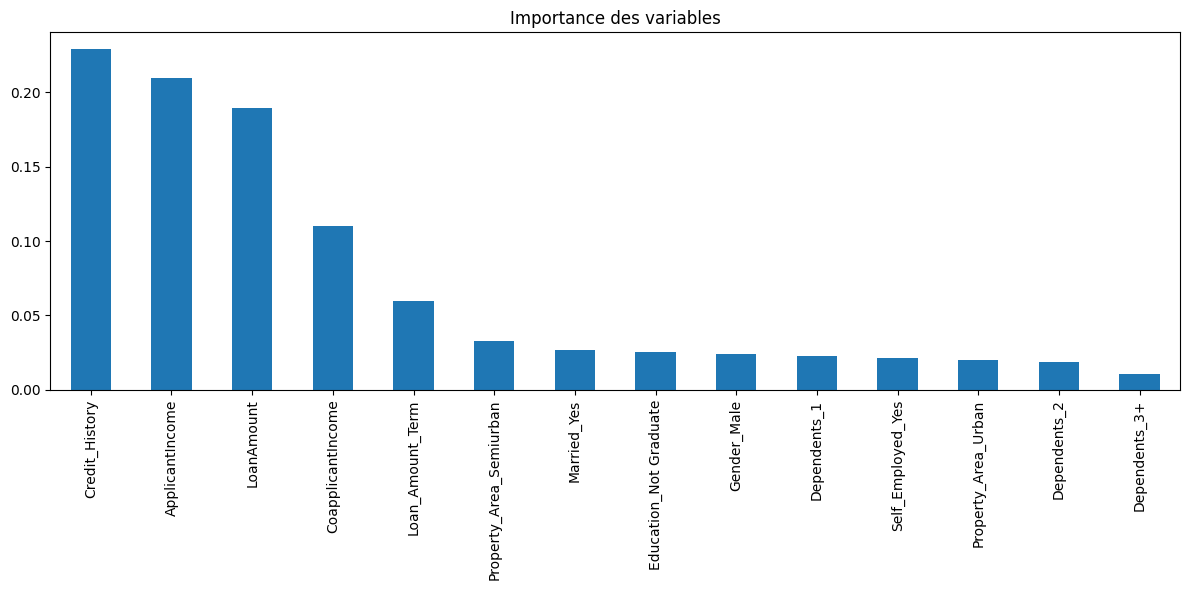

C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.98      0.87       100
           1       0.89      0.39      0.54        44

    accuracy                           0.80       144
   macro avg       0.84      0.68      0.71       144
weighted avg       0.82      0.80      0.77       144



In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

# Suppression des colonnes inutiles (ex: identifiants)
df = df.drop(columns=["Loan_ID"])

# Gestion des valeurs manquantes
df = df.dropna()  # ou utiliser imputation selon le besoin

# Cible et variables
X = df.drop(columns=['Loan_Status'])  # Loan_Status est la cible (Y/N)
y = df['Loan_Status'].map({'Y': 0, 'N': 1})  # 1 = défaut

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Importance des variables
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Importance des variables")
plt.tight_layout()
plt.show()

# Sélection des variables importantes
selector = SelectFromModel(model, threshold="median", prefit=True)
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

# Nouveau modèle sur features sélectionnées
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train_sel, y_train)
y_pred = model2.predict(X_test_sel)

# Évaluation
print(classification_report(y_test, y_pred))


Les **features les plus pertinentes** pour prédire un défaut de prêt sont :

### Variables les plus importantes :

1. `Credit_History` (≈ 23 %) → **Historique de crédit**
2. `ApplicantIncome` (≈ 21 %) → **Revenu du demandeur**
3. `LoanAmount` (≈ 19 %) → **Montant du prêt**
4. `CoapplicantIncome` (≈ 11 %) → **Revenu du co-demandeur**
5. `Loan_Amount_Term` (≈ 6 %) → **Durée du prêt**

Ces 5 variables concentrent l’essentiel du pouvoir prédictif (>80 % cumulé).

---

### Conclusion :

Pour prédire les défauts de prêt, **les variables à retenir** sont :

* `Credit_History`
* `ApplicantIncome`
* `LoanAmount`
* `CoapplicantIncome`
* `Loan_Amount_Term`

Les autres ont une influence marginale et peuvent être exclues pour un modèle plus simple.


## 🌟 Exercise 3 : Training, Evaluating, and Optimizing the Model
* Instructions
Which model(s) would you pick for a Loan Prediction ?
Outline the steps to evaluate the model’s performance, mentioning specific metrics that would be relevant to evaluate the model.


### Entraînement, évaluation et optimisation du modèle pour la prédiction de défaut de prêt :

---

### **Choix des modèles**

Pour un problème de **classification binaire (Défaut / Pas de défaut)**, les modèles pertinents sont :

1. **Logistic Regression**
   * Simple, rapide, interprétable (bon en baseline).

2. **Random Forest**
   * Robuste, gère bien les variables catégorielles, évite le surapprentissage.

3. **XGBoost / LightGBM**
   * Très performant pour les données tabulaires, bon en gestion des déséquilibres.

4. **Support Vector Machine (SVM)**
   * Efficace si les classes sont bien séparées, mais plus coûteux.

---

### **Étapes d’évaluation**

1. **Séparation des données**

   * Train/test split (ex : 80/20)
   * Option : validation croisée (k-fold)

2. **Prétraitement**

   * Encodage des variables catégorielles
   * Normalisation (si nécessaire)
   * Gestion des valeurs manquantes

3. **Entraînement du modèle**

   * Ajustement sur les données d'entraînement
   * Grid Search / Random Search pour l’optimisation des hyperparamètres

4. **Évaluation avec des métriques adaptées**

   **Métriques recommandées** :

   * **Accuracy** (utile si les classes sont équilibrées)
   * **Precision & Recall** (importants pour limiter les faux positifs/négatifs)
   * **F1-score** (compromis entre précision et rappel)
   * **ROC-AUC** (qualité globale du modèle)
   * **Confusion Matrix** (analyse fine des erreurs)

5. **Traitement du déséquilibre de classes (si besoin)**

   * Oversampling (SMOTE)
   * Undersampling
   * Poids de classe dans les modèles

---


## 🌟 Exercise 4 : Designing Machine Learning Solutions for Specific Problems
* Instructions
For each of these scenario, decide which type of machine learning would be most suitable. Explain.

* Predicting Stock Prices : predict future prices
Organizing a Library of Books : group books into genres or categories based on similarities.
Program a robot to navigate and find the shortest path in a maze.

## Conception de solutions ML adaptées à différents cas :

---

### **1. Prédiction des prix boursiers**

**Type de ML** : *Apprentissage supervisé* (régression)

**Explication** :
On dispose d’historiques de prix (données labellisées) et on cherche à prédire une valeur continue (prix futur).
Modèles : régression linéaire, LSTM, XGBoost, etc.

---

### **2. Organisation d’une bibliothèque de livres**

**Type de ML** : *Apprentissage non supervisé* (clustering)

**Explication** :
On ne connaît pas les genres à l’avance ; on veut regrouper automatiquement les livres selon leur contenu, mots-clés, etc.
Méthodes : k-means, DBSCAN, clustering hiérarchique, NLP + embeddings.

---

### **3. Navigation d’un robot dans un labyrinthe**

**Type de ML** : *Apprentissage par renforcement*

**Explication** :
Le robot apprend en interagissant avec l’environnement et reçoit des récompenses pour atteindre des objectifs (sortie du labyrinthe).
Méthodes : Q-learning, Deep Q Networks (DQN), A\* (non ML), etc.

---


## 🌟 Exercise 5 : Designing an Evaluation Strategy for Different ML Models
* Instructions
Select three types of machine learning models: one from supervised learning (e.g., a classification model), one from unsupervised learning (e.g., a clustering model), and one from reinforcement learning. 
* For the supervised model, outline a strategy to evaluate its performance, including the choice of metrics (like accuracy, precision, recall, F1-score) and methods (like cross-validation, ROC curves).
* For the unsupervised model, describe how you would assess the effectiveness of the model, considering techniques like silhouette score, elbow method, or cluster validation metrics.
* For the reinforcement learning model, discuss how you would measure its success, considering aspects like cumulative reward, convergence, and exploration vs. exploitation balance.
* Address the challenges and limitations of evaluating models in each category.

## **Stratégie d’évaluation pour différents types de modèles ML :**

---

### **1. Modèle supervisé – Classification (ex : prédiction de défaut de prêt)**

#### **Stratégie d’évaluation :**

* **Séparation des données** : Train/Test split + validation croisée (k-fold)
* **Métriques à utiliser** :

  * **Accuracy** : si classes équilibrées
  * **Precision** : éviter les faux positifs
  * **Recall** : éviter les faux négatifs
  * **F1-score** : bon compromis
  * **ROC-AUC** : performance globale (courbe ROC)
* **Méthodes** :

  * Courbe ROC / PR
  * Matrice de confusion
  * GridSearchCV pour les hyperparamètres

####  **Limites / Défis :**

* Biais de classe (déséquilibre)
* Données bruitées ou corrélées
* Surapprentissage possible sur petits ensembles

---

###  **2. Modèle non supervisé – Clustering (ex : regroupement de livres)**

####  **Stratégie d’évaluation :**

* **Silhouette Score** : cohérence intra/inter-cluster
* **Elbow Method** : choisir le bon nombre de clusters
* **Dunn Index, Davies-Bouldin Index** : qualité de séparation
* **Analyse manuelle** : inspection qualitative des groupes

####  **Limites / Défis :**

* Pas de “vérité terrain” (pas de label)
* Les résultats dépendent du choix de distance, initialisation, etc.
* L'interprétation des clusters peut être subjective

---

###  **3. Modèle d’apprentissage par renforcement (ex : robot dans un labyrinthe)**

####  **Stratégie d’évaluation :**

* **Cumulative Reward** : somme des récompenses totales sur les épisodes
* **Convergence** : stabilité de la politique (valeurs Q ou politiques apprises)
* **Taux de succès** : nombre de fois que l’objectif est atteint
* **Équilibre exploration/exploitation** : mesure de l'efficacité à découvrir sans trop exploiter

####  **Limites / Défis :**

* Convergence lente
* Sensible aux hyperparamètres (gamma, epsilon…)
* Risque de rester bloqué dans des politiques sous-optimales

---
